In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge customers and transactions on CustomerID
merged_data = pd.merge(transactions, customers, on="CustomerID")

# Aggregating transaction data by customer
customer_data = merged_data.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    avg_transaction_value=('TotalValue', 'mean'),
    num_transactions=('TransactionID', 'count')
).reset_index()

# Feature scaling using StandardScaler
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data[['total_spend', 'avg_transaction_value', 'num_transactions']])


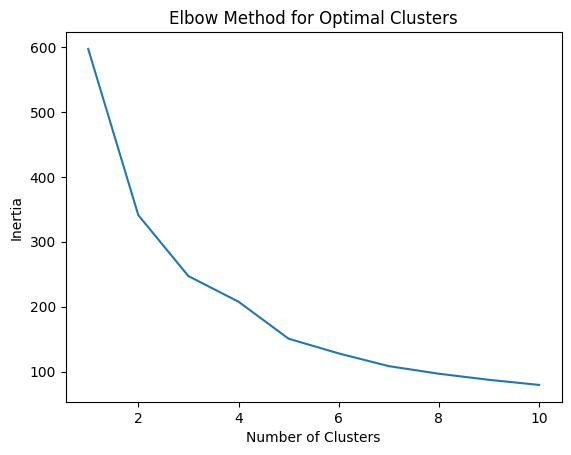

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Finding optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Method
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Applying K-Means with optimal clusters (assume 3 clusters from Elbow Method)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['kmeans_cluster'] = kmeans.fit_predict(customer_scaled)


In [3]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN (with epsilon and min_samples as parameters)
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_data['dbscan_cluster'] = dbscan.fit_predict(customer_scaled)


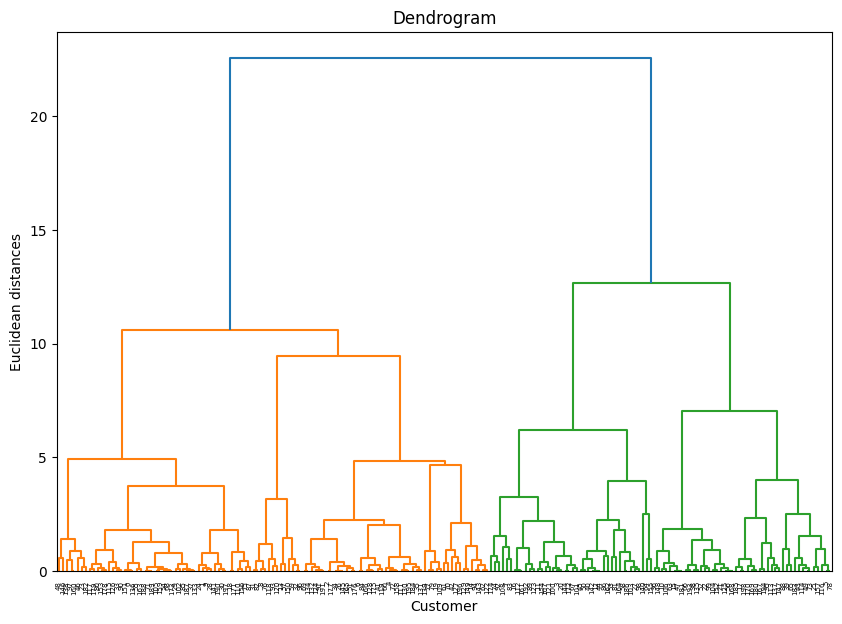

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical Clustering and plot dendrogram
linked = linkage(customer_scaled, method='ward')

# Create Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distances')
plt.show()

# Applying Agglomerative Clustering (for example, 3 clusters)
hierarchical = AgglomerativeClustering(n_clusters=3)
customer_data['hierarchical_cluster'] = hierarchical.fit_predict(customer_scaled)


In [5]:
from sklearn.metrics import silhouette_score

# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(customer_scaled, customer_data['kmeans_cluster'])
print(f"Silhouette Score for KMeans: {silhouette_kmeans}")

# Silhouette Score for DBSCAN (since DBSCAN has noise points, handle accordingly)
silhouette_dbscan = silhouette_score(customer_scaled, customer_data['dbscan_cluster'])
print(f"Silhouette Score for DBSCAN: {silhouette_dbscan}")


Silhouette Score for KMeans: 0.3602726278385162
Silhouette Score for DBSCAN: -0.05515764176516787


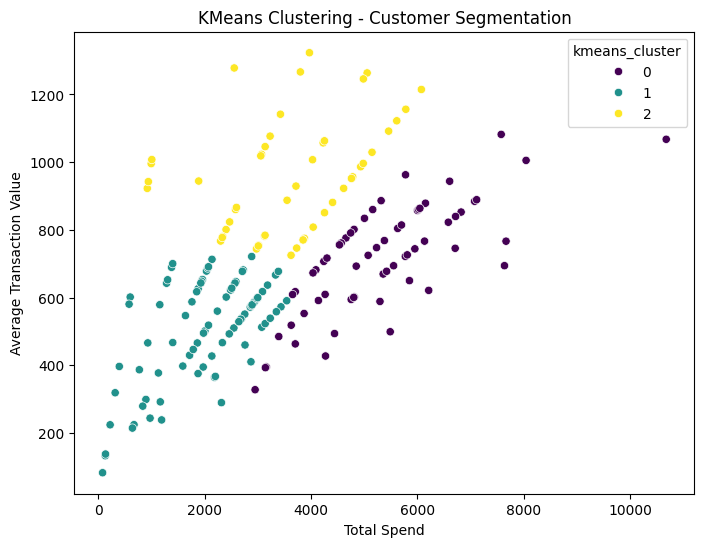

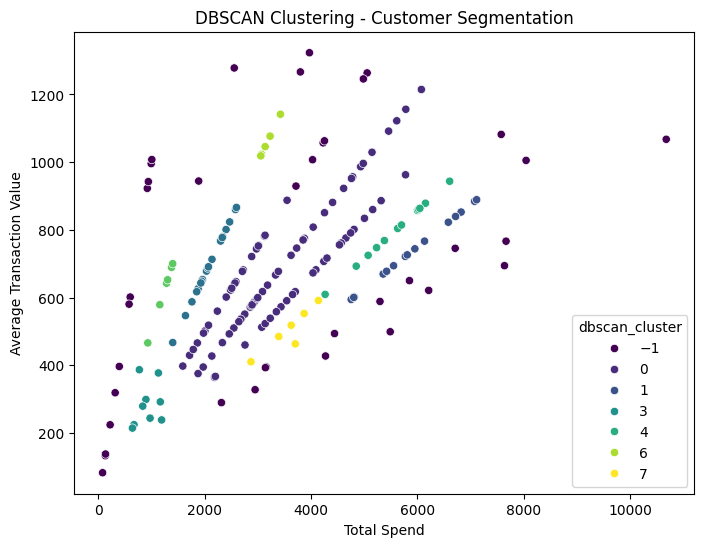

In [6]:
import seaborn as sns

# Plotting clusters for KMeans
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['total_spend'], y=customer_data['avg_transaction_value'], hue=customer_data['kmeans_cluster'], palette='viridis')
plt.title('KMeans Clustering - Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Average Transaction Value')
plt.show()

# Plotting clusters for DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['total_spend'], y=customer_data['avg_transaction_value'], hue=customer_data['dbscan_cluster'], palette='viridis')
plt.title('DBSCAN Clustering - Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Average Transaction Value')
plt.show()


''

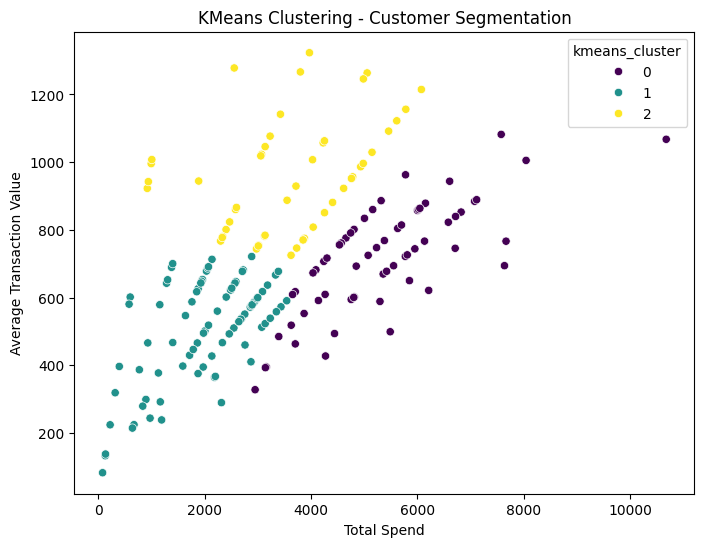

In [8]:
# Plotting clusters for KMeans and saving as an image
plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_data['total_spend'], y=customer_data['avg_transaction_value'], hue=customer_data['kmeans_cluster'], palette='viridis')
plt.title('KMeans Clustering - Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Average Transaction Value')

# Save the plot as a PNG file
plt.savefig('kmeans_cluster_plot.png')

# Insert the saved image into the PDF report
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()

# Add title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="Customer Segmentation Report", ln=True, align="C")

# Add clustering insights
pdf.set_font("Arial", size=12)
pdf.multi_cell(200, 10, txt="Clustering Insights:\n")
pdf.multi_cell(200, 10, txt=f"1. K-Means Silhouette Score: {silhouette_kmeans}\n")
pdf.multi_cell(200, 10, txt=f"2. DBSCAN Silhouette Score: {silhouette_dbscan}\n")

# Insert image for KMeans Clustering Visualization
pdf.image("kmeans_cluster_plot.png", x=10, y=60, w=180)

# Save the PDF report
pdf.output("Customer_Segmentation_Report.pdf")


In [11]:
# Saving clustering results
customer_data[['CustomerID', 'kmeans_cluster', 'dbscan_cluster', 'hierarchical_cluster']].to_csv('ANDRAJU_SAI LIKHITHA_Clusturing.csv', index=False)

# For the PDF report, you can use libraries like `matplotlib` to embed the images.
# Example:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()

# Add title
pdf.set_font("Arial", 'B', 16)
pdf.cell(200, 10, txt="ANDRAJU_SAI LIKHITHA_Clusturing", ln=True, align="C")

# Add clustering insights
pdf.set_font("Arial", size=12)
pdf.multi_cell(200, 10, txt="Clustering Insights:\n")
pdf.multi_cell(200, 10, txt=f"1. K-Means Silhouette Score: {silhouette_kmeans}\n")
pdf.multi_cell(200, 10, txt=f"2. DBSCAN Silhouette Score: {silhouette_dbscan}\n")

# Insert image for KMeans Clustering Visualization
pdf.image("kmeans_cluster_plot.png", x=10, y=60, w=180)

# Save the PDF report
pdf.output("ANDRAJU_SAI LIKHITHA_Clusturing.pdf")


''